# Lesson- Regular Expressions 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
hn=pd.read_csv('hacker_news.csv')
print(hn.shape)

(20099, 7)


In [2]:
print(hn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20099 non-null  int64 
 1   title         20099 non-null  object
 2   url           17659 non-null  object
 3   num_points    20099 non-null  int64 
 4   num_comments  20099 non-null  int64 
 5   author        20099 non-null  object
 6   created_at    20099 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB
None


In [3]:
print(hn.head())

         id                                              title  \
0  12224879                          Interactive Dynamic Video   
1  11964716  Florida DJs May Face Felony for April Fools' W...   
2  11919867       Technology ventures: From Idea to Enterprise   
3  10301696  Note by Note: The Making of Steinway L1037 (2007)   
4  10482257  Title II kills investment? Comcast and other I...   

                                                 url  num_points  \
0            http://www.interactivedynamicvideo.com/         386   
1  http://www.thewire.com/entertainment/2013/04/f...           2   
2  https://www.amazon.com/Technology-Ventures-Ent...           3   
3  http://www.nytimes.com/2007/11/07/movies/07ste...           8   
4  http://arstechnica.com/business/2015/10/comcas...          53   

   num_comments      author       created_at  
0            52    ne0phyte   8/4/2016 11:52  
1             1    vezycash  6/23/2016 22:20  
2             1     hswarna   6/17/2016 0:01  
3     

### Regular Expression (re) Module
- the `re.search()` [function](https://docs.python.org/3/library/re.html#re.search)
- Counting Matches with pandas using series.contains() [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) and series.sum() [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html)
-  Using Regular Expressions to select data (as boolean) 
- Quantifiers: Quantifiers specify how many of the previous character our pattern requires. 
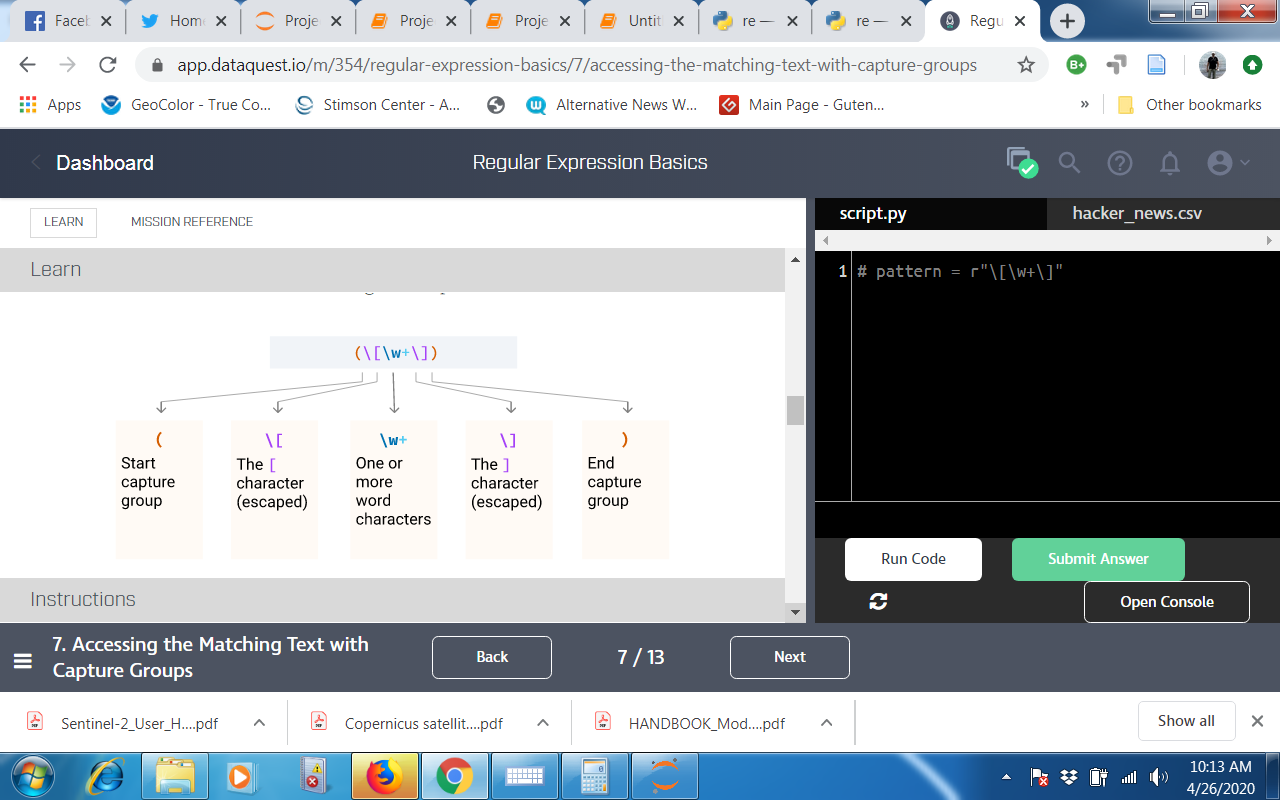

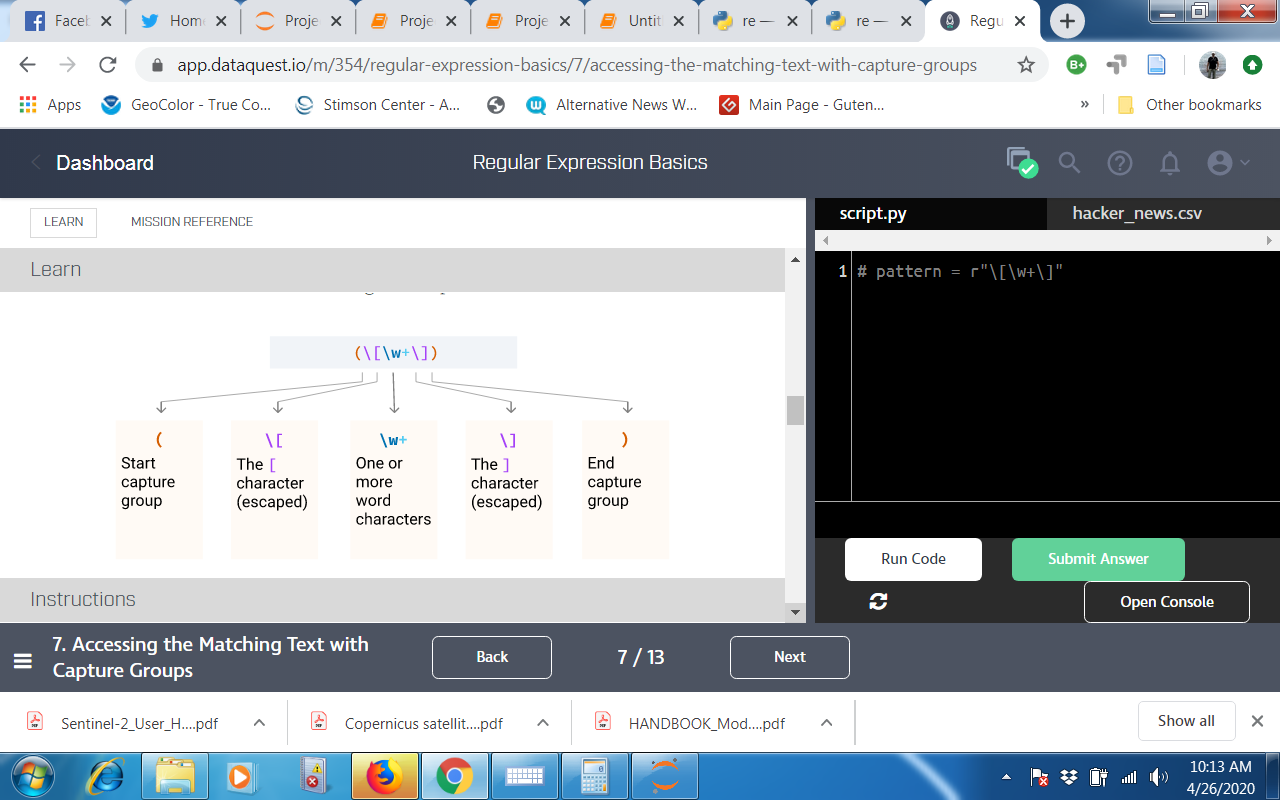

- Character Classes: Match groups of characters as wildcards, instead of individual characters.
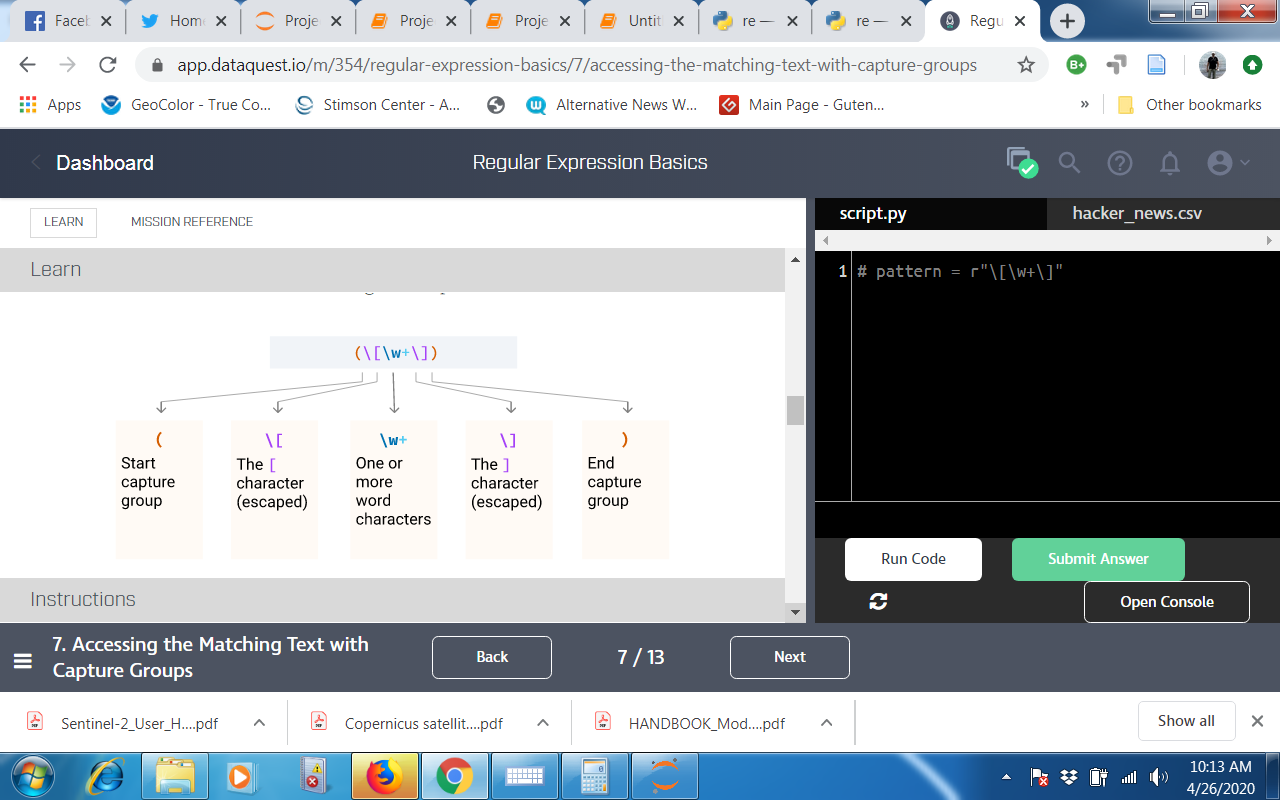

There are two things we can observe from above table:
1. Ranges can be used for letters as well as numbers.
2. Sets and ranges can be combined.
#### some other common character classes:
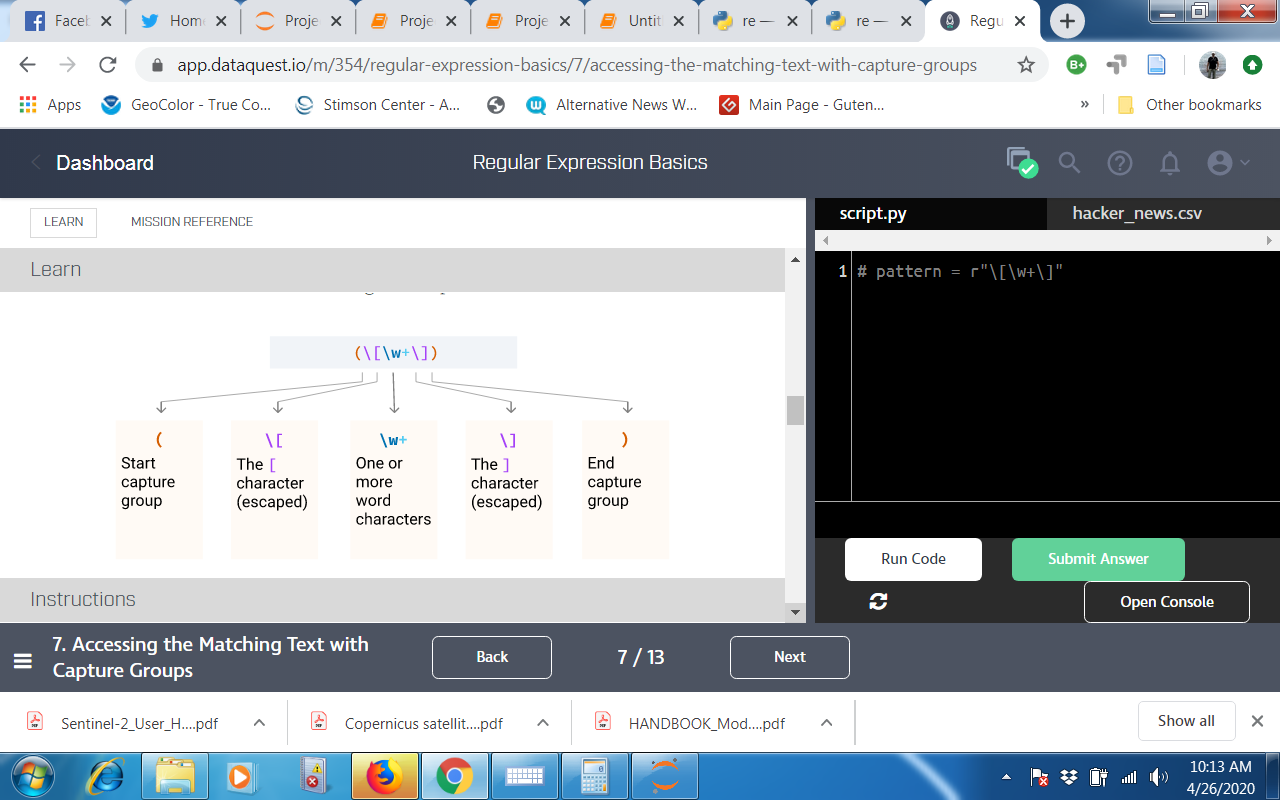

***Summary Character Classes:

1. We can use a backslash to escape characters that have special meaning in regular expressions (e.g. \ will match an open bracket character).
2. Character classes let us match certain groups of characters (e.g. \w will match any word character).
3. Character classes can be combined with quantifiers when we want to match different numbers of characters.

- Raw Strings: `r'str'`to avoid escape sequences such as `\n` (new line) or `\b` (backspace) in Python. Strongly recommended using raw strings for every regex.
- Capture Groups: Capture groups allow us to specify one or more groups within our match that we can access separately. 
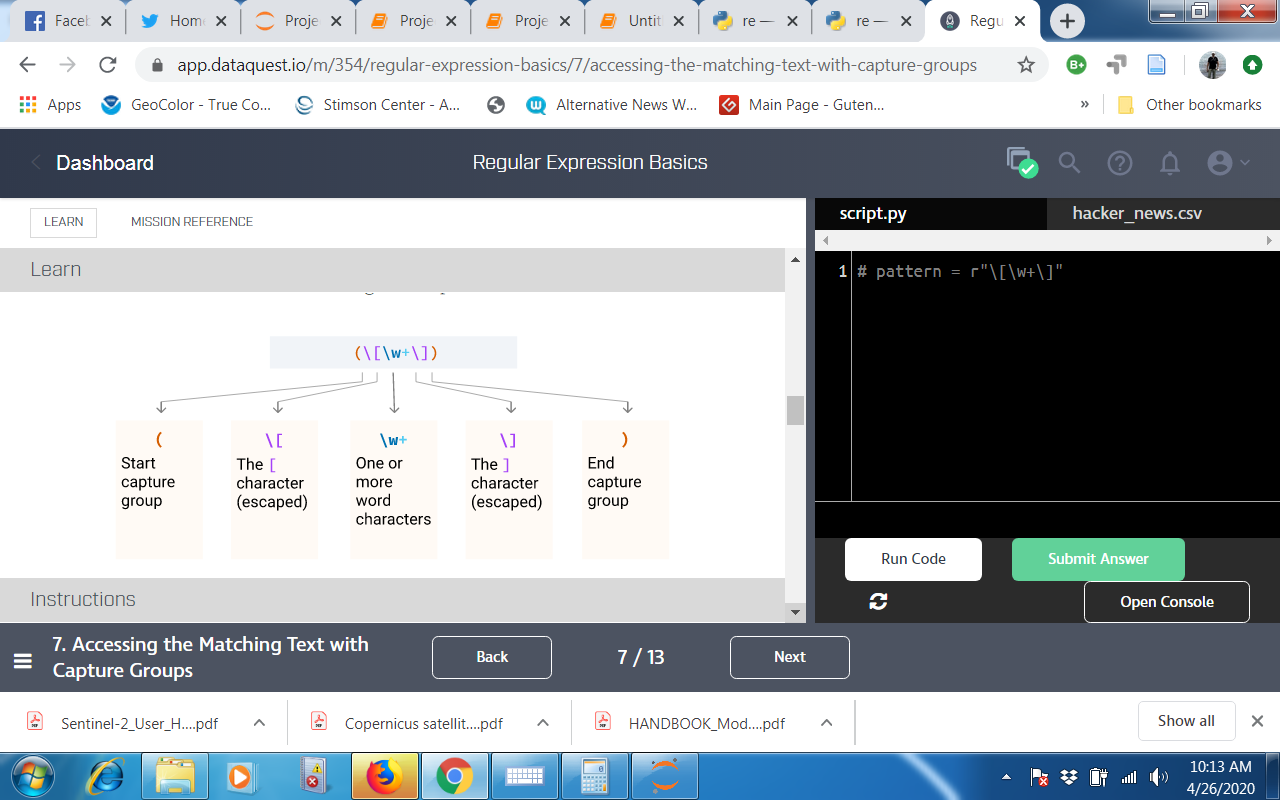
We use the `Series.str.extract()` [method](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.extract.html) to extract the match within our parentheses:

In [4]:
# Search function
import re

titles = hn["title"].tolist()
python_mentions=0
pattern='[Pp]ython'
for t in titles:
    if re.search(pattern,t):
        python_mentions+=1
print(python_mentions)       

160


In [5]:
# Instead of loop above, use vectorized operations
pattern = '[Pp]ython'
titles=hn['title']
python_mentions=titles.str.contains(pattern).sum()
print(python_mentions)

160


In [6]:
# Boolean operation to extract information
titles = hn['title']
ruby_titles=titles[titles.str.contains('[Rr]uby')]
print(ruby_titles.head())

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object


In [7]:
# Quantifiers: email or e-mail
email_bool=titles.str.contains('e-?mail')
email_count=email_bool.sum()
email_titles=titles[email_bool]  
print(email_titles.head())                               

119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
Name: title, dtype: object


In [8]:
# Character Classes - Tags e.g. [pdf],[videos]
pattern='\[\w+\]' #backslash escapes special characters [],+ quantifier for 1 or more match, w special character for any digit or word
tag_titles=titles.str.contains(pattern)
tag_count=tag_titles.sum()
print(tag_count)

444


In [9]:
# Capture Group
titles = hn['title']
pattern = r'\[(\w+)\]'
tag_freq=titles.str.extract(pattern,expand=False)

print(tag_freq.value_counts()) 


pdf            276
video          111
audio            3
2015             3
2014             2
beta             2
slides           2
Petition         1
song             1
survey           1
comic            1
coffee           1
ask              1
Live             1
ANNOUNCE         1
USA              1
detainee         1
repost           1
png              1
JavaScript       1
gif              1
5                1
SPA              1
Map              1
German           1
satire           1
map              1
videos           1
Excerpt          1
GOST             1
React            1
much             1
Benchmark        1
SpaceX           1
crash            1
Skinnywhale      1
Australian       1
viz              1
HBR              1
transcript       1
NSFW             1
Challenge        1
Ubuntu           1
CSS              1
blank            1
Infograph        1
2008             1
1996             1
updated          1
Videos           1
Beta             1
Python           1
Name: title,

- Negative Character Classes: Negative character classes are character classes that match every character except a character class.
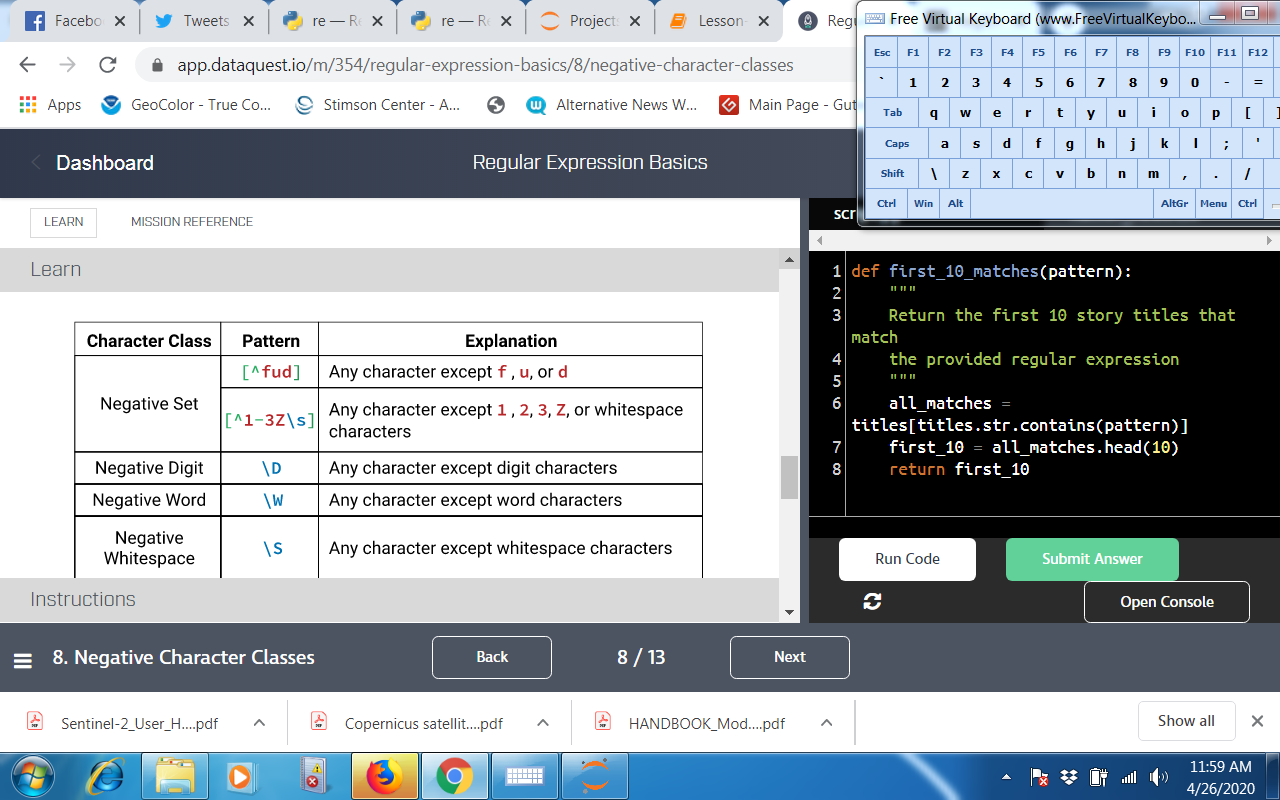


In [10]:
# Function defined to check whether the Regex pattern is correct
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10
pattern=r'[Jj]ava^[Ss]'#wrong Regex built
x=first_10_matches(pattern)
print('Wrong Pattern Result:','\n',x)
pattern=r'[Jj]ava[^Ss]'
x=first_10_matches(pattern)
print('\n','Right Pattern Result:','\n',x)
java_titles=titles[titles.str.contains(pattern)]

Wrong Pattern Result: 
 Series([], Name: title, dtype: object)

 Right Pattern Result: 
 436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
2910                2016 JavaOne Intel Keynote  32mn Talk
3452    What are the Differences Between Java Platform...
Name: title, dtype: object


Above the negative set was effective in removing any bad matches that mention JavaScript, it also had the side-effect of removing any titles where Java occurs at the end of the string, like this title:
` Pippo  Web framework in Java `
This is because the negative set [^Ss] must match one character. Instances at the end of a string aren't followed by any characters, so there is no match.

- Word Boundaries: word boundary anchor, specified using the syntax `\b`. A word boundary matches the position between a word character and a non-word character, or a word character and the start/end of a string.
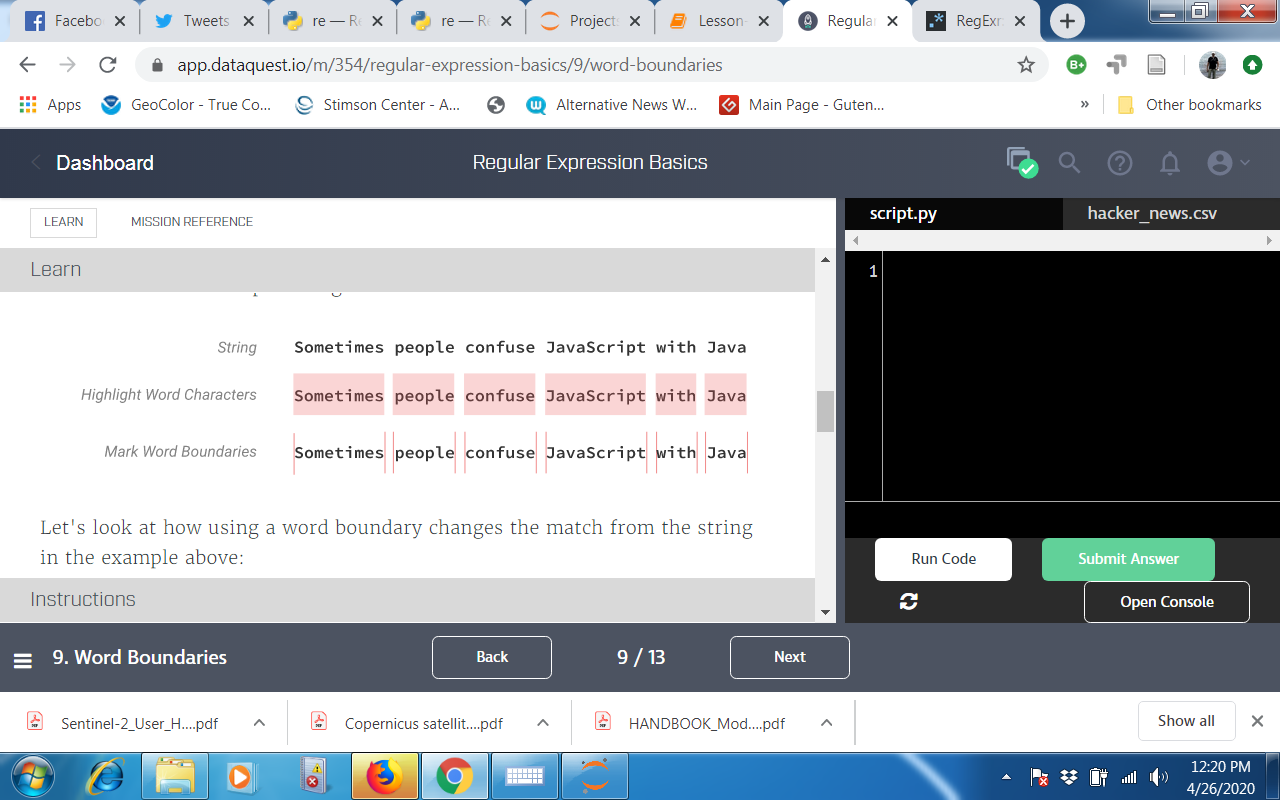


In [11]:
def first_10_matches(pattern):
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10
pattern=r'\b[Jj]ava\b'
print(first_10_matches(pattern)) # correct pattern
java_titles=titles[titles.str.contains(pattern)]

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
3228                              Comparing Rust and Java
3452    What are the Differences Between Java Platform...
Name: title, dtype: object


- Matching at the start and end of string: Other than the word boundary anchor, the other two most common anchors are the `beginning anchor` and the `end anchor`, which represent the start and the end of the string, respectively.
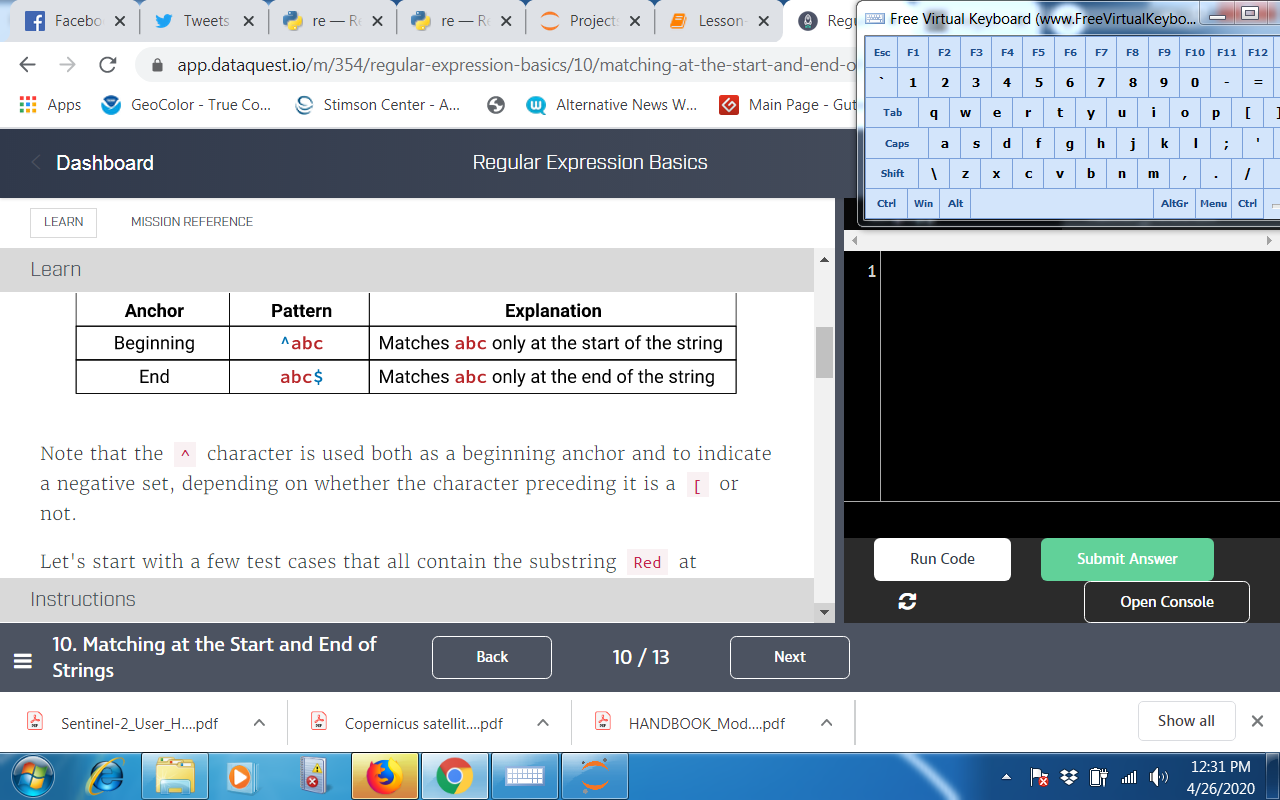

In [12]:
beginning_count=titles.str.contains(r'^\[\w+\]').sum() # counts tags at beggining
end_count=titles.str.contains(r'\[\w+\]$').sum() # counts tags at end
print(beginning_count,end_count)

15 417


- [Flags](https://docs.python.org/3/library/re.html#re.A) to modify Regex patterns
- The most common and the most useful flag is the `re.IGNORECASE` [flag](https://docs.python.org/3/library/re.html#re.I), which is also available using the alias `re.I` for convenience

In [13]:
import re

email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails']) #test series for building Regex pattern
pattern=r"\be[\-\s]?mails?\b" #word boundary so that pattern does not capture words like "late mail" or "emailing"
email_tests=email_tests.str.contains(pattern,flags=re.I)

print(email_tests)
email_mentions=titles.str.contains(pattern,flags=re.I).sum() #performing regex on 'titles' after verification above
print(email_mentions)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
dtype: bool
141


# Lesson- Regular Expressions (Advanced)

In [14]:
# Using re.I Flag
pattern=r'sql' #will give 'sql' or 'SQL' evenif combined with prefixes or suffixes such as mysql etc.
sql_counts=titles.str.contains(pattern,flags=re.I).sum()
print(sql_counts)
print(titles[titles.str.contains(pattern,flags=re.I)].head())

108
9      Crate raises $4M seed round for its next-gen S...
142                 PostgreSQL: Linux VS Windows  part 2
221                 MemSQL (YC W11) Raises $36M Series C
394                         The History of SQL Injection
419    Pentesterlab Tutorial  SQL injection to web ad...
Name: title, dtype: object


In [15]:
# Using word boundary in pattern
pattern=r'\bsql\b' # will give only 'sql' or 'SQL'
sql_counts=titles.str.contains(pattern,flags=re.I).sum()
print(sql_counts)
print(titles[titles.str.contains(pattern,flags=re.I)].head())

39
9       Crate raises $4M seed round for its next-gen S...
394                          The History of SQL Injection
419     Pentesterlab Tutorial  SQL injection to web ad...
513                         Crab  SQL for your filesystem
1164    Show HN: Migrate  Sane database/sql migrations...
Name: title, dtype: object


In [16]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
sql_pattern=r'(\w+sql)'
hn_sql['flavor']=hn_sql['title'].str.extract(sql_pattern,flags=re.I)
hn_sql['flavor'].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
CloudSQL       1
MemSQL         1
SparkSQL       1
nosql          1
mySql          1
Name: flavor, dtype: int64

In [17]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
sql_pattern=r'(\w+sql)'
hn_sql['flavor']=hn_sql['title'].str.extract(sql_pattern,flags=re.I)
hn_sql['flavor'].value_counts()
hn_sql['flavor']=hn_sql['flavor'].str.lower()
sql_pivot=hn_sql.pivot_table(index='flavor',values='num_comments',aggfunc=np.mean)
print(sql_pivot)

            num_comments
flavor                  
cloudsql        5.000000
memsql         14.000000
mysql          12.230769
nosql          14.529412
postgresql     25.962963
sparksql        1.000000


In [18]:
#Using Capture Groups to extract data
pattern=r'[pP]ython\s([\d\.]+)' #\s is optional, a space can be given instead r'[pP]ython ([\d\.]+)'
versions=titles.str.extract(pattern,flags=re.I,expand=False) # expand=Falseis default
value_counts=versions.value_counts() # extra step,not needed

py_versions_freq=dict(versions.value_counts())
print(py_versions_freq)



{'3': 10, '3.5': 3, '2': 3, '3.6': 2, '3.5.0': 1, '4': 1, '2.7': 1, '8': 1, '1.5': 1}


In [19]:
# Counting mentions of C language
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

pattern = r"\b[Cc]\b[^.+]" # excludes unnecessary characters suffixed to C, \b provides boundary
first_ten=first_10_matches(pattern)
print(first_ten) ## irrelevant results at index 444 and 1949 (due to negative anchnor)

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object


- Lookarounds: There are four types of lookarounds
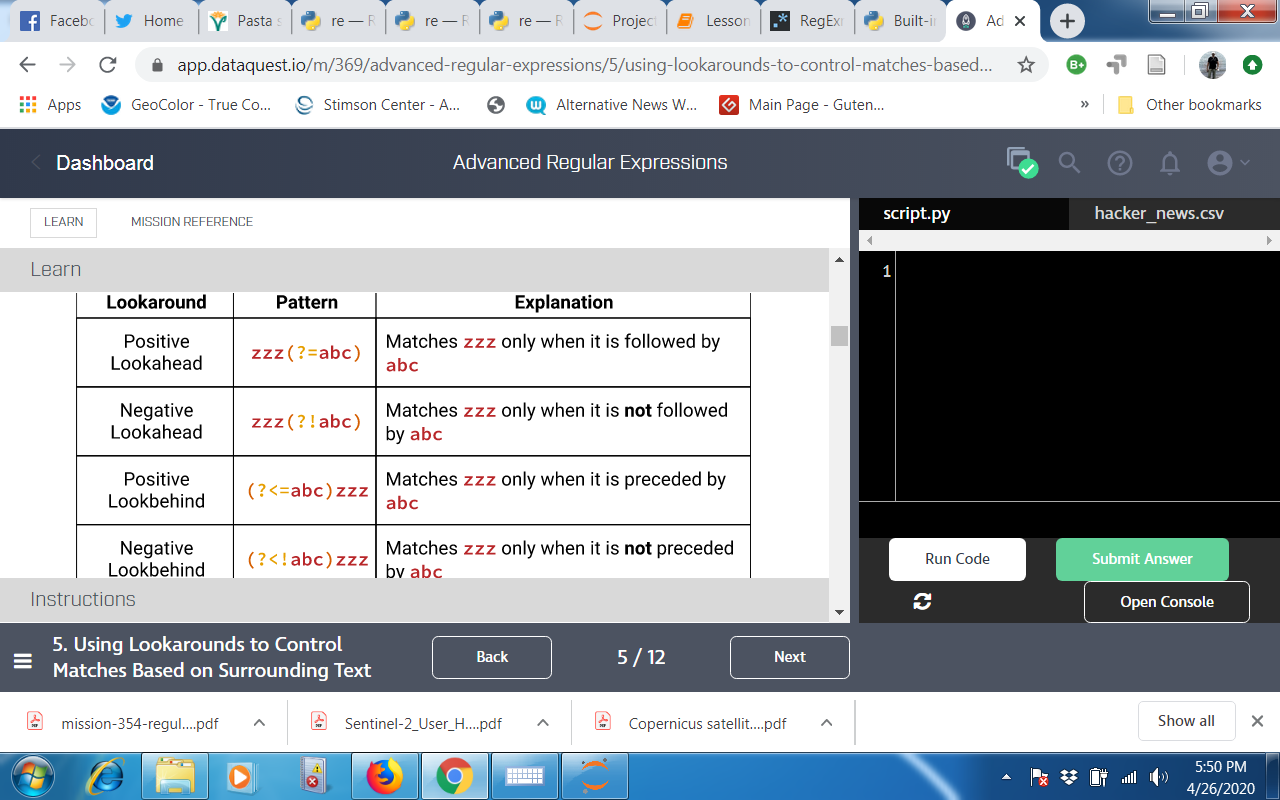

- Inside the parentheses, the first character of a lookaround is always `?`.
- If the lookaround is a lookbehind, the next character will be `<`, which one can think of as an arrow head pointing behind the match.
- The next character indicates whether the lookaround is positive `(=)` or negative `(!)`.


In [20]:
pattern=r"(?<!Series\s)\b[Cc]\b(?![\+\.])"
c_mentions=titles.str.contains(pattern).sum()
print(c_mentions)
print(titles[titles.str.contains(pattern)].head())
print(titles[titles.str.contains(pattern)].tail()) # Many problems still exist

102
365                 The new C standards are worth it
521     Fuchsia: Micro kernel written in C by Google
1307       Show HN: Yupp, yet another C preprocessor
1326                The C standard formalized in Coq
1365                     GNU C Library 2.23 released
Name: title, dtype: object
18543                 C-style for loops removed from Swift
18549            Show HN: An awesome C library for Windows
18649                 Python vs. C/C++ in embedded systems
19151                      Ask HN: How to learn C in 2016?
19933    Lightweight C library to parse NMEA 0183 sente...
Name: title, dtype: object


In [21]:
pattern=r"(?<![.°Series\s])\b[Cc]\b(?![\.\+])" #Filtered further
c_mentions=titles.str.contains(pattern).sum()
print(c_mentions)
print(titles[titles.str.contains(pattern)].head())
print(titles[titles.str.contains(pattern)].tail())

18
4295                 C strings with implicit length field
4576    Ask HN: Which linux/unix C++/C IDE are you using?
4754           Amazon bans the sale of rogue USB-C cables
6172                      Bad USB-C cable destroys laptop
7185    Apple rejects the Binding of Isaac: Rebirth b/...
Name: title, dtype: object
13683    NeXTstep Manual, Systems Programming with Obje...
13842    C Is Manly, Python Is for N00bs:How False Ster...
14909    Google engineer finds USB Type-C cable thats s...
16693                 C as an Intermediate Language (2012)
18543                 C-style for loops removed from Swift
Name: title, dtype: object


- Backreferences using Capture Groups in Regular Expressions Patterns
Whenever we have one or more capture groups, we can refer to them using integers left to right as shown in this regex that matches the string `HelloGoodbye`

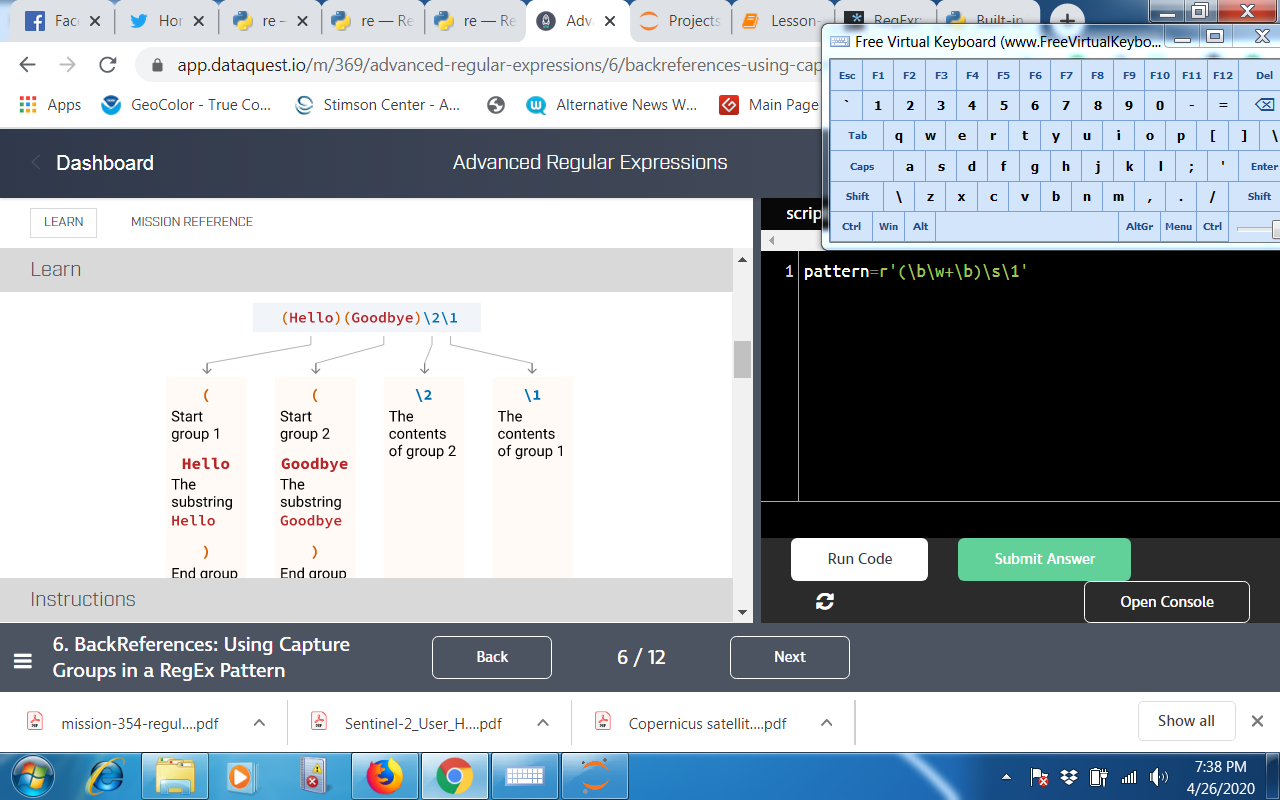

The regular expression above will match the text `HelloGoodbyeGoodbyeHello`

In [22]:
pattern=r'\b(\w+)\s\1\b'
repeated_words=titles[titles.str.contains(pattern)]

print(repeated_words)

3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object


C:\Users\pc\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


- Substituting Regex Matches:
When we learned to work with basic string methods, we used the `str.replace()` method to replace simple substrings. We can achieve the same with regular expressions using the `re.sub()` [function](https://docs.python.org/3/library/re.html#re.sub). The basic syntax for re.sub() is:
`
re.sub(pattern, repl, string, flags=0)
`
When working in pandas, we can use the `Series.str.replace()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html), which uses nearly identical syntax:
`
Series.str.replace(pat, repl, flags=0)
```
sql_variations = pd.Series(`["SQL", "Sql", "sql"]`)

sql_uniform = sql_variations.str.replace(r"sql", "SQL", flags=re.I)
print(sql_uniform)
```
`
sql_variations = pd.Series(["SQL", "Sql", "sql"])

sql_uniform = sql_variations.str.replace(r"sql", "SQL", flags=re.I)
print(sql_uniform)
`

`


In [23]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])
pattern=r'[eE][\s-]?mail'

email_uniform=email_variations.str.replace(pattern,'email',flags=re.I)
print(email_uniform)
titles_clean=titles.str.replace(pattern,'email',flags=re.I)
titles=titles_clean
print(titles.str.contains(r'email').sum()) #how many values replaced?
print(titles.str.contains(pattern).sum()) #confirmed all values replaced
print(titles[titles.str.contains(r'email')].head(10))


0    email
1    email
2    email
3    email
4    email
5    email
6    email
7    email
8    email
dtype: object
151
151
119     Show HN: Send an email from your shell to your...
161     Computer Specialist Who Deleted Clinton emails...
174                                       email Apps Suck
261     emails Show Unqualified Clinton Foundation Don...
313         Disposable emails for safe spam free shopping
332                          Inky: Secure email Made Easy
450     Mailtrain (the open sourcemailchimp clone) is ...
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
1774    From email Introductions to Addressing Diversi...
Name: title, dtype: object


- Extracting Domains from URLs: 

In [36]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])
pattern=r'://(\w[\-.\.\w]+)'
test_urls_clean=test_urls.str.extract(pattern)
print(test_urls_clean)

                                  0
0                    www.amazon.com
1   www.interactivedynamicvideo.com
2                   www.nytimes.com
3                     evonomics.com
4                        github.com
5                          phys.org
6                      iot.seeed.cc
7                  www.bfilipek.com
8             beta.crowdfireapp.com
9                      www.valid.ly
10        css-cursor.techstream.org


In [35]:
import re
pattern=r'://(\w[\-.\.\w]+)'
domains=hn['url'].str.extract(pattern,expand=False,flags=re.I)
top_domains=domains.value_counts().head()
print(top_domains)

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: url, dtype: int64


- Extracting url components using multiple capture groups:
 we'll extract each of the three component parts of the URLs:
- Protocol
- Domain
- Page path

In [46]:
pattern=r'(.+?)://(\w[\-\.\w]+)/?(.*)'
test_url_parts=test_urls.str.extract(pattern)
print(test_url_parts)
url_parts=hn['url'].str.extract(pattern,flags=re.I)
print(url_parts.head())

        0                                1  \
0   https                   www.amazon.com   
1    http  www.interactivedynamicvideo.com   
2    http                  www.nytimes.com   
3    http                    evonomics.com   
4   HTTPS                       github.com   
5    Http                         phys.org   
6   https                     iot.seeed.cc   
7    http                 www.bfilipek.com   
8    http            beta.crowdfireapp.com   
9   https                     www.valid.ly   
10   http        css-cursor.techstream.org   

                                                    2  
0   Technology-Ventures-Enterprise-Thomas-Byers/dp...  
1                                                      
2                 2007/11/07/movies/07stein.html?_r=0  
3   advertising-cannot-maintain-internet-heres-sol...  
4                                         keppel/pinn  
5                 news/2015-09-scale-solar-youve.html  
6                                                      

- Using Named Capture Groups to Extract Data
We will name the columns of url above with named capture groups:
- Protocol
- Domain
- Path
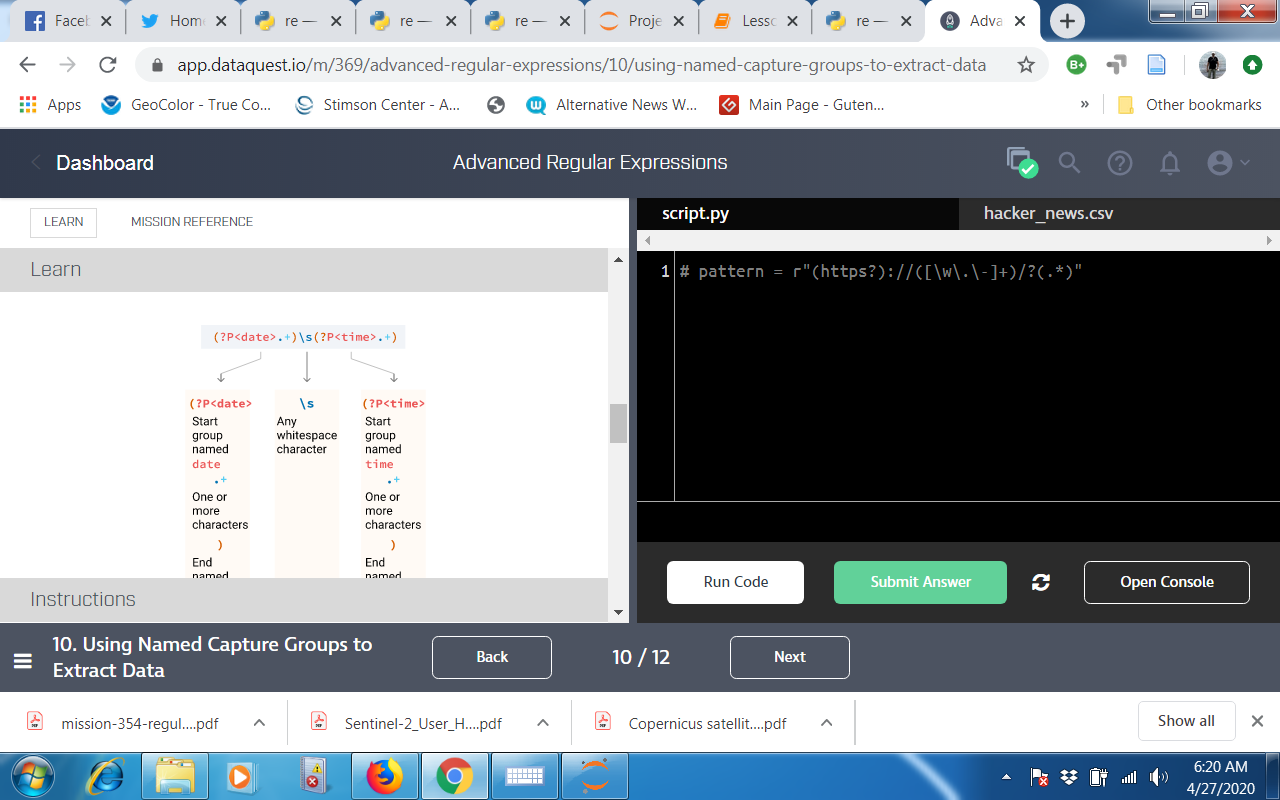

In [47]:
pattern = r"(?P<protocol>.*?)://(?P<domain>\w[\w.-]+)/?(?P<path>.*)"
url_parts=hn['url'].str.extract(pattern,flags=re.I)
print(url_parts.head())

  protocol                           domain  \
0     http  www.interactivedynamicvideo.com   
1     http                  www.thewire.com   
2    https                   www.amazon.com   
3     http                  www.nytimes.com   
4     http                  arstechnica.com   

                                                path  
0                                                     
1  entertainment/2013/04/florida-djs-april-fools-...  
2  Technology-Ventures-Enterprise-Thomas-Byers/dp...  
3                2007/11/07/movies/07stein.html?_r=0  
4  business/2015/10/comcast-and-other-isps-boost-...  
